In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img)

In [7]:
# 随机加椒盐函数
def salt(img,n):
    # 循环添加n个椒盐
    for k in range(n):
        # 随机添加椒盐的坐标
        i = int(np.random.random()*img.shape[0])
        j = int(np.random.random()*img.shape[1])
        # 若位灰度图
        img[i,j] = 255
        # 若为RGB图
        img[i,j,0] = 255
        img[i,j,0] = 255
        img[i,j,0] = 255
    return img

In [5]:
# 图像平滑处理：在尽量保留图像原有信息的情况下，过滤掉图像内部的噪声，这一过程称作对图像的平滑处理
# 图像平滑处理的基本原理是：将噪声所在像素点值处理成周围临近像素的近似值
# 取近似值的方式很多：
# 均值滤波
# 方框滤波
# 高斯滤波
# 中值滤波
# 双边滤波
# 2D卷积（自定义滤波）

# 7.1 均值滤波

### 7.1.1 基本原理

In [6]:
# 均值滤波：用当前像素点周围N*N个像素值代替当前像素值
# 对于边缘像素点1.N*N中只取图像内存在的像素点取均值；2.边缘扩展，新增行列填充不同像素值后计算均值，opencv提供了多种边界处理模式
# 对整幅图像所有像素点都进行均值滤波，卷积和越大，图像失真越严重

### 7.1.2 函数语法

In [8]:
# dst = cv2.blur(src,ksize,anchor,borderType)
# dst：均值滤波后的处理结果
# src：原始图像，可以是任意数量通道，并能对各通道独立处理，图像深度以ing该是CV_8U,CV_16U,CV_16S,CV_32F,CV_64F中的一种
# ksize：滤波核大小
# anchor：锚点，默认值（-1，-1），表示当前计算均值的点位于核心
# borderType：边界央视，决定以何种方式处理边界，一般使用默认值，见书P150
# 一般式：
# dst = cv2.blur(src,ksize)

### 7.1.3 程序示例

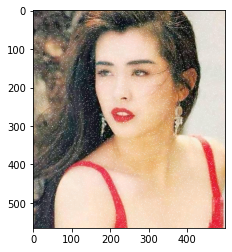

In [26]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
wzx_salt = salt(wzx,10000)
wzx_blur = cv2.blur(wzx_salt,(5,5))
img_show(wzx_salt)

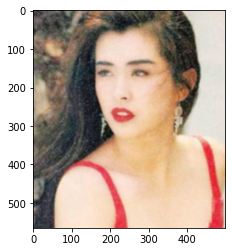

In [27]:
img_show(wzx_blur)

# 7.2 方框滤波

### 7.2.1 基本原理

In [29]:
# 方框滤波可以自由选择滤波结果是邻域像素值之和的均值，还是邻域像素值之和

### 7.2.2 函数语法

In [30]:
# dst = cv2.boxFilter(src,ddepth,ksize,anchor,normalize,borderType)
# dst：滤波后的结果
# src：原始图像，可以是任意数量通道，并能对各通道独立处理，图像深度以ing该是CV_8U,CV_16U,CV_16S,CV_32F,CV_64F中的一种
# ddepth：处理结果图像的深度，一般用-1表示与原图像相同深度
# ksize：卷积核大小
# anchor：锚点，默认值（-1，-1），表示当前计算均值的点位于核心
# normalize：表示滤波时是否进行归一化，逻辑值，1：要进行归一化，和/面积；0：不需要归一化，直接用邻近像素之和
# borderType：边界样式，决定以何种方式处理边界，一般使用默认值，见书P150
# 一般式：
# dst = cv2.boxFilter(src,ddepth,ksize)

### 7.2.3 程序示例

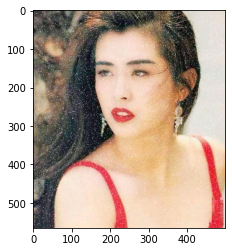

In [47]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
wzx_salt = salt(wzx,10000)
wzx_box1 = cv2.boxFilter(wzx_salt,-1,(5,5))
img_show(wzx_salt)

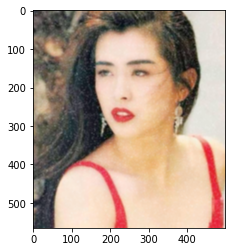

In [48]:
img_show(wzx_box1)

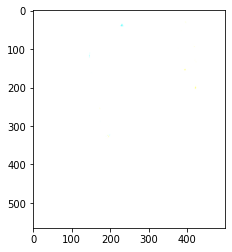

In [49]:
wzx_box0 = cv2.boxFilter(wzx_salt,-1,(5,5),normalize=0)
img_show(wzx_box0)

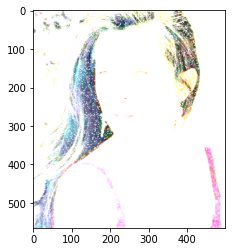

In [50]:
wzx_box0 = cv2.boxFilter(wzx_salt,-1,(2,2),normalize=0)
img_show(wzx_box0)

# 7.3 高斯滤波

### 7.3.1 基本原理

In [51]:
# 均值和方框滤波，邻近区域每个像素点权重相同，高斯滤波加大中心点权重，减小远离中心点的权重
# 高斯滤波中，卷积和内的值不再都是1，中心权重高，四周权重低，像素值与卷积核权重相乘求和
# 高斯滤波中，核的宽高可以不同，但必须是奇数
# 实际计算中，卷积核是归一化处理的

### 7.3.2 函数语法

In [52]:
# dst = cv2.GaussianBlue(src,ksize,sigmaX,sigmaY,borderType)
# dst：滤波后的结果
# src：原始图像，可以是任意数量通道，并能对各通道独立处理，图像深度以ing该是CV_8U,CV_16U,CV_16S,CV_32F,CV_64F中的一种
# ksize：卷积核大小（宽高可以不同，必须是奇数）
# sigmaX：卷积核在水平方向上的标准差
# sigmaY：卷积核在垂直方向上的标准差，若将该值设为0，则采用sigmaX的值；
# 如果sigmaX，sigmaY都是0，则通过ksize.width,ksize.height计算得到
# sigmaX = 0.3*[(ksize.width-1)*0.5-1]+0.8
# sigmaY = o.3*[(ksize.height-1)*0.5-1]+0.8
# borderType：边界样式，决定以何种方式处理边界，一般使用默认值，见书P150
# sigmaY，borderType是可选参数，sigmaX是必选参数，但是可以将该值设为0，让函数自己算sigmaX
# 一般式：
# dst = cv3.GaussianBlur(src,ksize,0,0)

### 7.3.3 程序示例

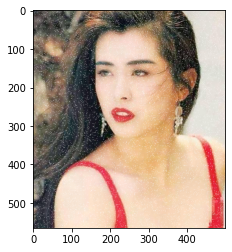

In [53]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
wzx_salt = salt(wzx,10000)
wzx_gs = cv2.GaussianBlur(wzx_salt,(5,5),0,0)
img_show(wzx_salt)

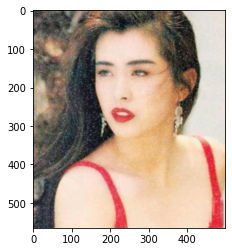

In [54]:
img_show(wzx_gs)

# 7.4 中值滤波

### 7.4.1 基本原理

In [55]:
# 中值滤波不再采用加权求平均的方式计算滤波结果，它用邻域内的所有像素值的中间值代替当前像素点的像素值

### 7.4.2 函数语法

In [61]:
# dst = cv2.medianBlur(src,ksize)
# dst：滤波后的结果
# src：原始图像，可以是任意数量通道，并能对各通道独立处理，图像深度以ing该是CV_8U,CV_16U,CV_16S,CV_32F,CV_64F中的一种
# ksize：卷积核大小（必须是比1大的奇数，如3，5，7）

# 由于没有均值处理，中值滤波不存在均值滤波方式带来的细节模糊问题
# 但在中值滤波中，噪声成分很难被选上，所以可以几乎不影响原有图像情况下去除全部噪声，但由于排序操作，运算量较大

### 7.4.3 程序示例

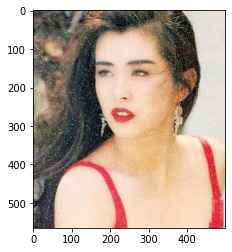

In [59]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
wzx_salt = salt(wzx,10000)
wzx_med = cv2.medianBlur(wzx_salt,3)
img_show(wzx_salt)

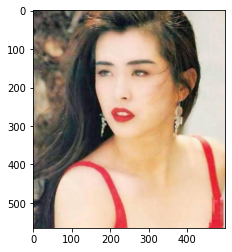

In [60]:
img_show(wzx_med)

# 7.5 双边滤波

### 7.5.1 基本原理

In [62]:
# 双边滤波是综合考虑空间信息和色彩信息的滤波方式，但滤波过程中能够有效保护图像内的边缘信息
# 前述的滤波方式都只考虑了空间的权重信息，计算方便，但边缘信息处理存在问题
# 双边滤波在计算像素点的新值时，不仅考虑距离信息（距离越远，权重越小），还考虑色彩信息（色彩差别越大，权重越小）
# 对于左白右黑的图，计算边缘左侧白色像素时，与右侧黑色像素点色差过大，给左侧权重最大，右侧为0，保留左侧边缘；反之保留右侧边缘

### 7.5.2 函数语法

In [63]:
# dst = cv2.bilateralFilter(src,d,sigmaColor,sigmaSpace,borderType)
# dst：滤波后的结果
# src：原始图像，可以是任意数量通道，并能对各通道独立处理，图像深度以ing该是CV_8U,CV_16U,CV_16S,CV_32F,CV_64F中的一种
# d：滤波时选用的空间距离参数，这里表示以当前像素点为中心带你的直径，如果为非正数，则自动从参数sigmaSpace计算得到。
# 如果滤波空间较大(d>5)，则速度较慢，推荐d=5，对于较大噪声的离线滤波，可以选择d=9
# sigmaColor：滤波时选取的颜色差值范围，该值决定了周围哪些像素点能够参与到滤波中来，值越大，说明周围越多像素点可参与到计算中
# 该值为0时，滤波失去意义；值为255时，指定直径内的所有像素点都能参与运算
# sigmaSpace：空间的sigma值，值越大，越多的点能参与到滤波计算中来，当d>0时，无论sigmaSpace值如何，d都指定邻域大小；
# 否则d与sigmaSpace的值成比例
# borderType：边界样式，决定以何种方式处理边界，一般使用默认值，见书P150
# 为了简单，将两个sigma值设置为相同的，如果直径比较小，滤波效果不明显，如果直径比较大，会产生卡通效果
# 除borderType外，都是必选参数

### 7.5.3 程序示例

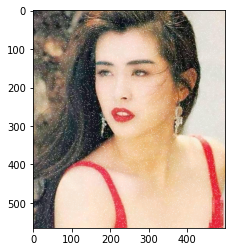

In [74]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
wzx_salt = salt(wzx,10000)
wzx_blt = cv2.bilateralFilter(wzx_salt,25,100,100)
img_show(wzx_salt)

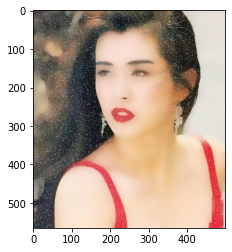

In [75]:
img_show(wzx_blt)

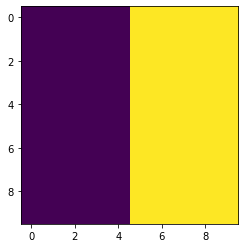

In [83]:
img = np.zeros([10,10],dtype=np.uint8)
img[:,5:] = 255
img_show(img)

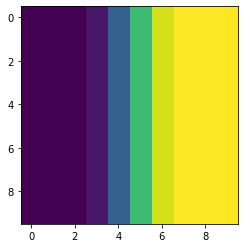

In [85]:
img = np.zeros([10,10],dtype=np.uint8)
img[:,5:] = 255
img = cv2.GaussianBlur(img,(5,5),0,0)
img_show(img)

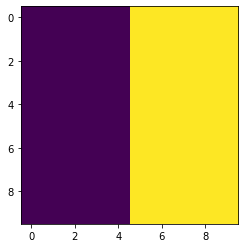

In [86]:
img = np.zeros([10,10],dtype=np.uint8)
img[:,5:] = 255
img = cv2.bilateralFilter(img,55,100,100)
img_show(img)

# 7.6 2D卷积

In [89]:
# 如上滤波形式都无法将卷积和设置为特定形式，若要将卷积核设置成特定形式，要使用opencv的自定义卷积函数

# opencv中允许用户自定义卷积，函数是cv2.filter():
# dst = cv2.filter(src,ddepth,kernel,anchor,delta,borderType)
# dst：滤波后结果
# src：原始图像
# ddepth：处理结果图像的图像深度，-1表示原始图像使用相同图像深度
# kernel：卷积核，一个单通道数组，如果想在处理彩色图像时，让每个通道使用不同的核，则必须将彩色图像分解后使用不同的核完成操作
# anchor：锚点，默认值（-1，-1），表示当前计算均值的点位于核的中心位置
# delta：修正值，可选项，如果该值存在，会在基础滤波的结果上加上该值作为最终的滤波结果处理
# borderType：边界样式，该值决定了以何种方式处理边界
# 一般式：
# dst = cv2.filter2D(src,ddepth,kernel)

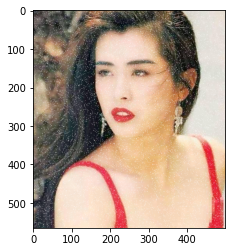

In [91]:
# 自定义一个卷积核，9*9，让卷积核内所有权重值相等，通过函数cv2.filter2D()对图像进行滤波操作
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
wzx_salt = salt(wzx,10000)
kernel = np.ones([9,9],dtype=np.float32)/81
dst = cv2.filter2D(wzx_salt,-1,kernel)
img_show(wzx_salt)

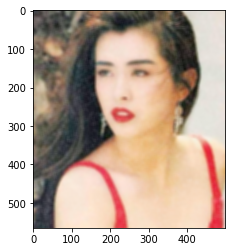

In [92]:
img_show(dst)